## Tarea 1 - NLP CIMAT: Python
##### Por: Gustavo Hernández Angeles

* La carpeta `clean_estenograficas` y el archivo `corpus.txt` deben estar en el mismo directorio que este notebook.

In [1]:
import glob

## 1. Construcción de un corpus

In [2]:
corpus = open(".\\corpus.txt", "r", encoding="utf-8").read()

## 2. Vistazo a los datos

#### 1. **Cargue todas las conferencias en un *string* y aplique la función *split* para generar tokens facilmente.**

In [3]:
tokens = corpus.split()

#### 2. **Contar la cantidad de palabras en todas las conferencias.**

In [4]:
n_palabras = len(tokens)
print("Numero total de palabras:",n_palabras)

Numero total de palabras: 16465189


#### 3. **Extraer el vocabulario y mostrar su longitud de todo el corpus.**

In [5]:
n_vocabulario = len(set(tokens))
print("Tamaño del vocabulario:",n_vocabulario)

Tamaño del vocabulario: 262016


#### 4. **Mida la riqueza del vocabulario de alguna forma en todos los documentos.**

In [6]:
# Podemos medir la riqueza mediante
razon = n_palabras/n_vocabulario
print("Razón no. términos entre el vocabulario:", razon)

Razón no. términos entre el vocabulario: 62.84039524303859


#### 5. **Haga lo mismo que los 4 puntos anteriores pero con todo el texto en minúsculas. Vea las diferencias y comente brevemente.**

In [7]:
# Todo el texto en minúsculas.
tokens_minusculas = corpus.lower().split()

print("Número de términos:",len(tokens_minusculas))
print("Tamaño de vocabulario:",len(set(tokens_minusculas)))
print("Razón no. términos entre el vocabulario:", len(tokens_minusculas)/len(set(tokens_minusculas)))

Número de términos: 16465189
Tamaño de vocabulario: 239383
Razón no. términos entre el vocabulario: 68.78178066111629


* El número total de términos se mantiene invariante, lo cual es normal.
* El tamaño del vocabulario decrece debido a que, palabras que se diferenciaban mediante el uso de mayúscula (e.g. "caballo" y "Caballo"), ahora se cuentan como una misma.
* A consecuencia de lo anterior, la razón entre el tamaño del número de terminos entre el vocabulario crece; pasando de $\sim 62.84$ a $\sim 68.78$.

#### 6. **Haga lo mismo que los puntos 1, 2 y 3 usando el tokenizador *RegExp* de NLTK, con una expresión regular que trate de sacar solo tokens que pueden contener solo letras mayúsculas y minúsculas. Después cargue los tokens en un objeto *Text* de NLTK en lugar de una lista de Python.**

In [8]:
import nltk
from nltk.tokenize import RegexpTokenizer

# 1. Generamos los tokens con RegexpTokenizer.
# La expresión regular aceptará solo palabras con carácteres comunes en
# español.
re_tokenizer = r'[a-zA-ZáéíóúñÁÉÍÓÚÑ]+'
tokenizer = RegexpTokenizer(re_tokenizer)
text_conferencias = tokenizer.tokenize(corpus) # Tokens
text_conferencias = nltk.text.Text(text_conferencias)

# 2. Número total de términos
print("Numero total de tokens:", len(text_conferencias))

# 3. Tamaño del vocabulario
print("Tamaño del vocabulario:", len(set(text_conferencias)))

Numero total de tokens: 16264559
Tamaño del vocabulario: 106649


#### 7. **Haga todo el texto minúsculas. Haga los mismo que los puntos 1, 2 y 3 usando el tokenizados *TweetTokenizer*; COMENTE BREVEMENTE DIFERENCIAS. Haga el resto de esta tarea asumiendo haber hecho este punto.**

In [9]:
from nltk.tokenize import TweetTokenizer

# 1. Generamos los tokens con TweetTokenizer.
tw_tokenizer = TweetTokenizer()
twitter_text_conferencias = tw_tokenizer.tokenize(corpus.lower()) # Tokens
twitter_text_conferencias = nltk.text.Text(twitter_text_conferencias)

# 2. Número total de términos
print("Numero total de tokens:", len(twitter_text_conferencias))

# 3. Tamaño del vocabulario
print("Tamaño del vocabulario:", len(set(twitter_text_conferencias)))

Numero total de tokens: 19163452
Tamaño del vocabulario: 98637


* El TweetTokenizer está hecho para tokenizar carácteres o secuencias de carácteres importantes para los tweets; "hashtags", emoticonos, simbolos y @usuarios en este ejemplo. Mientras que el primer tokenizador solo toma en cuenta las palabras con mayúsculas o minúsculas.

* Esto tiene como consecuencia un mayor número de términos para el TweetTokenizer. Aunque en tamaño del vocabulario gana RegexpTokenizer, por las distintas formas de escribir las palabras con mayúsculas y minúsculas. Al menos eso creo.

In [10]:
tweet = "This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <-- @remy: This is waaaaayyyy too much for you!!!!!!"
print(nltk.text.Text(tw_tokenizer.tokenize(tweet)))

<Text: This is a cooool #dummysmiley : :-) :-P...>


## 3. Funciones NLTK

#### 1. Use la función *concordance* para ver el contexto de 5 palabras que usted elija.

In [11]:
palabras = [
    "justicia",
    "pueblo",
    "fox",
    "gobiernos",
    "delincuencia"
]

for palabra in palabras:
    text_conferencias.concordance(palabra)


Displaying 25 of 6111 matches:
os muchas cosas buenas a favor Sin justicia no hay garantía de seguridad tranq
Conferencia de prensa matutina Sin justicia no hay garantía de seguridad tranq
 presidente de la Suprema Corte de Justicia fue directo al problema de la corr
mo sin ninguna limitación que haya justicia A ver acá porque no quiero que tú 
n mantener fuera del alcance de la justicia este acto que han padecido Esa es 
y la tranquilidad son frutos de la justicia Entonces es complementario Son pro
erdad creo que el que lucha por la justicia no tiene nada que temer De todas f
s ministros de la Suprema Corte de Justicia la mayoría por corrupción El puebl
 ministro para la Suprema Corte de Justicia Está vacante el lugar del ministro
agistrada del Tribunal Superior de Justicia en el Estado de Querétaro Es egres
residente del Tribunal Superior de Justicia del Distrito Federal ahora Ciudad 
uello que no afecte el que se haga justicia debe de haber de transparencia por
 y los sueldos la Sup

#### 2. Elija una palabra que le parezca interesante y muestre palabras con uso similar. Muestre también los contextos comunes.

In [12]:
text_conferencias.similar("tren")

país estado gobierno año día presidente pueblo tema tiempo trabajo que
caso y programa presupuesto proceso aeropuerto mundo proyecto dinero


In [13]:
text_conferencias.common_contexts(["tren","muy"])

y_de un_ligero del_importante es_y también_de de_bajo del_cerca y_en
como_de es_de no_de de_distinto


#### 3. Haciendo uso de alguna librería *time* de Python: organice todos los archivos de las conferencias desde la más antigua hasta la más nueva (echando mano del nombre del archivo y fechas), y cárguelos en un objeto *Text* para generar un *dispersion plot* de las siguientes palabras: *prian*, *corrupción*, *mafia*, *narco*, *gasolina*, pipas, conacyt, conahcyt, ciencia, turismo, pandemia, coronavirus, covid, delta, omicron, vacuna, vacunacion y otras cinco palabras de su elección.

* Haré uso de la función `dispersion_plot` directamente de nltk.draw, ya que esta función si me permite ignorar que sean mayúsculas o minúsculas.

De estas gráficas podemos notar varias cosas:

* La palabra **"corrupción"** y **"gasolina"** han sido de constante uso durante el sexenio de Obrador, y sigue vigente con la actual presidenta.
* Si bien la palabra **"narco"** y **"mafia"** estuvieron relativamente presentes, no fue hasta más de la segunda mitad donde se empezaron a usar con mayor frecuencia.
* Como se esperaría, las palabras **"conacyt"** y **"conahcyt"** tienen muy claros periodos disjuntos de uso.
    - De hecho, el primero uso de la palabra **CONAHCYT** fue cuando se anunció, por ello está tan alejado.
* A causa de la pandemia, las palabras **"pandemia"**, **"covid"**, **"vacuna"** y **"coronavirus"** son empezadas a usar en el mismo periodo de tiempo. 
    - **"COVID"** se convirtió en el término preferido para referirse al coronavirus.
    - Tiempo después del inicio, **"Delta"** empieza a ser utilizada a causa de la variante, aunque en un periodo corto de tiempo.
    - La distribución de **"Vacuna"** fue bajando con el tiempo.
    - **"Pandemia"** ha sido constante desde su inicio.

<Axes: title={'center': 'Palabras Propuestas'}, xlabel='Word Offset'>

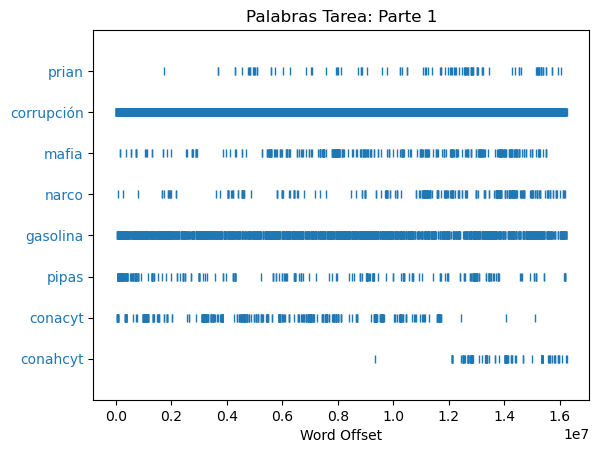

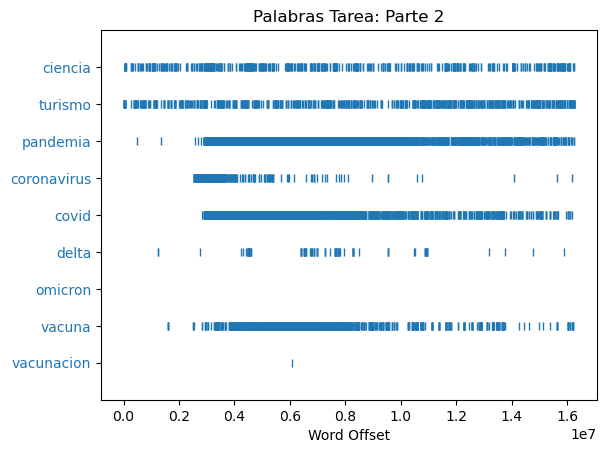

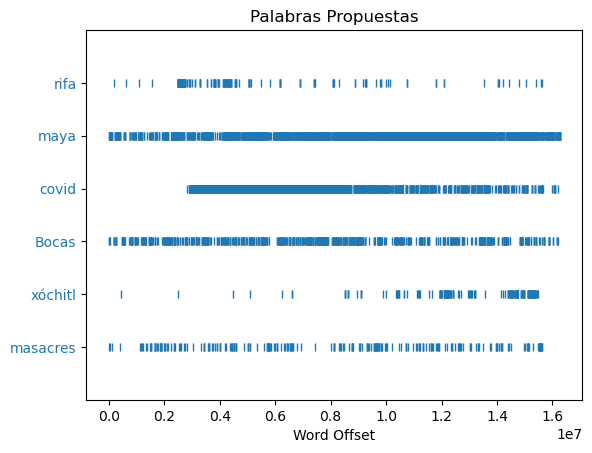

In [14]:
from nltk.draw import dispersion_plot

palabras1 = [
    "prian",
    "corrupción",
    "mafia",
    "narco",
    "gasolina",
    "pipas",
    "conacyt",
    "conahcyt"
]

palabras2 = [
    "ciencia",
    "turismo",
    "pandemia",
    "coronavirus",
    "covid",
    "delta",
    "omicron",
    "vacuna",
    "vacunacion"
]

palabras_eleccion = [
    "rifa",
    "maya",
    "covid",
    "Bocas",
    "xóchitl",
    "masacres"
]

dispersion_plot(text_conferencias, palabras1, ignore_case=True, title="Palabras Tarea: Parte 1")
dispersion_plot(text_conferencias, palabras2, ignore_case=True, title="Palabras Tarea: Parte 2")

dispersion_plot(text_conferencias, palabras_eleccion, ignore_case=True, title="Palabras Propuestas")

#### 4. Muestre 50 colocaciones de todo el corpus.

* Mayormente se debe al nombre de los presidentes.
* Nombres de estados como Baja California, Nuevo León, Quintana Roo.
* Nombres de proyectos e instituciones.

In [15]:
text_conferencias.collocations(50)

ANDRÉS MANUEL; PRESIDENTE ANDRÉS; LÓPEZ OBRADOR; MANUEL LÓPEZ; Estados
Unidos; por ciento; señor presidente; todos los; Buenos días; Guardia
Nacional; nada más; Muchas gracias; mil millones; López Obrador; Tren
Maya; Poder Judicial; Baja California; Andrés Manuel; RAMÍREZ CUEVAS;
buenos días; JESÚS RAMÍREZ; que que; Quintana Roo; SHEINBAUM PARDO;
CLAUDIA SHEINBAUM; muy importante; desde luego; sobre todo; creo que;
MÉXICO CLAUDIA; Cuarta Transformación; todas las; Manuel López; por
ejemplo; nuestro país; Por eso; Comisión Federal; adultos mayores; con
centavos; derechos humanos; Fiscalía General; ver con; por eso; los
mexicanos; García Luna; Nuevo León; sin embargo; tiene que; gobierno
federal; los trabajadores


#### 5. Muestre un histograma de longitud en carácteres de las palabras. Muestre en el histograma el top 5 de longitudes más largas.

Podemos observar que hay palabras demasiado grandes, en el top 5 se encuentran longitudes que van desde 27 carácteres hasta 48! 

Comprobé, quise buscar esas palabras y resultó que eran partes de URL que se encuentran en las mañaneras.

Por ejemplo, en "jovenesconstruyendoelfuturo.stps.gob.mx" se detectan las 4 palabras presentes, así, el tokenizador pensará que "jovenesconstruyendoelfuturo" es una palabra válida de 27 caracteres.

In [16]:
from nltk import FreqDist

longitudes = [len(palabra) for palabra in text_conferencias]
fdist = FreqDist(longitudes)

In [17]:
# Top 5 longitudes más largas
sorted(set(longitudes), reverse=True)[:5]

[48, 41, 33, 31, 27]

<Axes: xlabel='Samples', ylabel='Counts'>

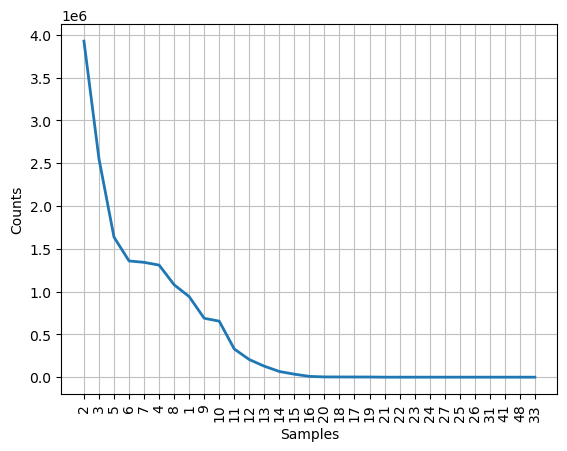

In [18]:
fdist.plot(48, cumulative=False)

#### 6. Muestre 50 palabras con longitud mayor a 8 caracteres y frecuencia mayor a 5 en todo el texto usando comprehension list de Python.

In [19]:
fdist = FreqDist(text_conferencias)

In [20]:
largas = [palabra for palabra, frecuencia in fdist.items() if len(palabra)> 8 and frecuencia > 5]
print(largas[:50])
largas.sort(key=fdist.get, reverse=True)
print(largas[:50])

['PRESIDENTE', 'acordamos', 'presentar', 'seguridad', 'resultados', 'mexicanos', 'trabajando', 'inseguridad', 'violencia', 'reuniones', 'Seguridad', 'tendencia', 'elementos', 'instrumentos', 'enfrentar', 'legalmente', 'corrupción', 'contubernio', 'autoridades', 'delincuencia', 'resolviendo', 'avanzando', 'garantizar', 'tranquilidad', 'Conferencia', 'Publicado', 'diciembre', 'coordinada', 'institución', 'dependencia', 'trabajaba', 'perseverancia', 'atendiendo', 'importante', 'impunidad', 'construyendo', 'instalaciones', 'cuarteles', 'inteligencia', 'persiguiendo', 'opositores', 'propósito', 'estrategia', 'bienestar', 'moralizar', 'informarles', 'secretario', 'Protección', 'Ciudadana', 'Cresencio']
['presidente', 'PRESIDENTE', 'importante', 'INTERLOCUTOR', 'información', 'INTERLOCUTORA', 'Secretaría', 'corrupción', 'seguridad', 'mexicanos', 'trabajadores', 'secretario', 'trabajando', 'situación', 'presupuesto', 'elementos', 'investigación', 'INTERVENCIÓN', 'Presidente', 'violencia', 'con

#### 7. Ver https://www.nltk.org/book/ch02.html en la seccion 1.5. Proponga una gráfica usando *ConditionalFreqDist* como la sección 1.5 para estos datos. Usted elige las palabras.

En esta ocasión utilicé la carpeta `clean_estenograficas` para realizar el objeto *conditionalFreqDist*, ya que aún incluye información sobre el año.

Lo hice contando las veces que se mencionaban las palabras "covid", "vacuna" y "pandemia" en cada año. Podemos ver ciertos detalles:

* En 2019 no se habló nada de vacunas, covid y pandemia.
* Se habló de las 3 palabras con la misma intensidad en 2020.
* El año 2021 fue el pico más alto donde se habló de la vacuna, y el año en donde se empezó a aplicar.
* La frecuencia con la que eran pronunciadas las palabras empezó a decaer exponencialmente desde ese año.
* covid y pandemia fueron utilizadas con la misma frecuencia en todo el periodo.

In [21]:
# De forma similar al dispersion plot, veremos el uso de las palabras.
# a lo largo de los documentos.

cfd = nltk.ConditionalFreqDist(
    (word[:len(target)], documento[-14:-10])
    for documento in glob.glob(".\\clean_estenograficas\\*.txt")
    for word in open(documento, "r").read().lower().split()
    for target in ["vacuna", "covid", "pandemia"]
    if word.startswith(target)
)

<Axes: xlabel='Samples', ylabel='Counts'>

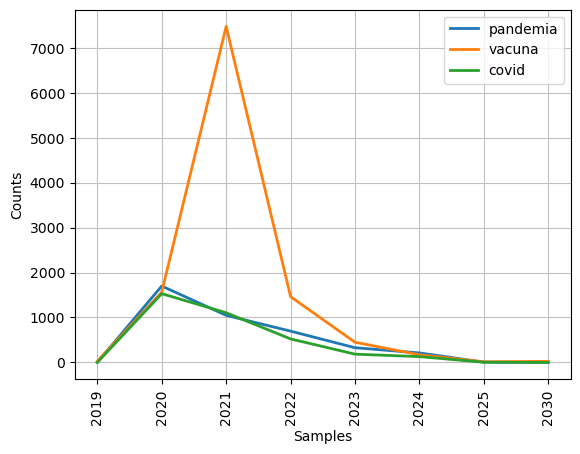

In [22]:
cfd.plot()

#### 8. Use la lista de stopwords de nltk y obtenga la cantidad de palabras en los datos con y sin stopword. Comente brevemente las diferencias.

In [23]:
from nltk.corpus import stopwords

In [24]:
print(stopwords.fileids())

['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [25]:
stopwords_espanol = stopwords.words("spanish")
# Este objeto Text contiene los datos con stopwords, es el
# que hemos estado utilizando
text_conferencias

# Creamos un nuevo Text que no contenga las stopwords.
# Será con las palabras en minúsculas para la comparación en el
# siguiente punto.
text_conferencias_nosp = nltk.text.Text(
    [w.lower()
     for w in text_conferencias 
     if w.lower() not in stopwords_espanol]
)

In [26]:
print(f"Cantidad de palabras con stopwords: {len(text_conferencias)}.")
print(f"Cantidad de palabras sin stopwords: {len(text_conferencias_nosp)}.")

Cantidad de palabras con stopwords: 16264559.
Cantidad de palabras sin stopwords: 7836769.


**¡El número de palabras se redujo en más de la mitad!**

#### 9. Muestre las 300 palabras más frecuentes en las conferencias, sin tomar en cuenta stop-words. Muéstrelas de la más frecuente a la menos frecuente.

In [27]:
# Para esto utilizaremos un objeto freqDist
freq_palabras = FreqDist(text_conferencias_nosp)

<Axes: title={'center': 'Primeras 20 palabras'}, xlabel='Samples', ylabel='Counts'>

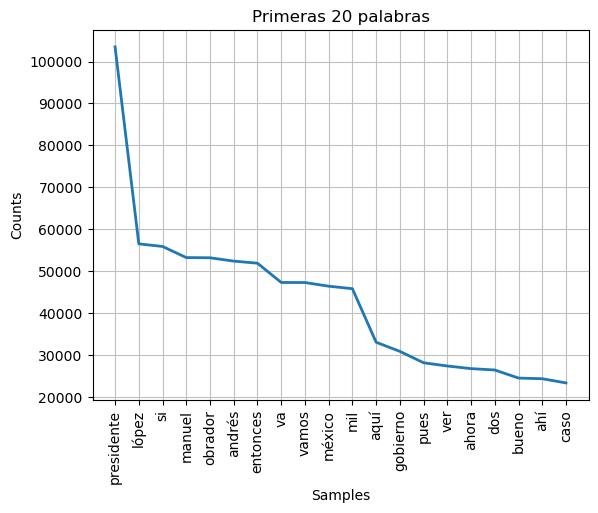

In [28]:
freq_palabras.plot(20, title="Primeras 20 palabras")

In [29]:
freq_palabras.most_common(300)

[('presidente', 103490),
 ('lópez', 56523),
 ('si', 55898),
 ('manuel', 53247),
 ('obrador', 53200),
 ('andrés', 52400),
 ('entonces', 51907),
 ('va', 47311),
 ('vamos', 47294),
 ('méxico', 46425),
 ('mil', 45824),
 ('aquí', 33053),
 ('gobierno', 30874),
 ('pues', 28156),
 ('ver', 27392),
 ('ahora', 26760),
 ('dos', 26433),
 ('bueno', 24511),
 ('ahí', 24350),
 ('caso', 23351),
 ('millones', 23103),
 ('cómo', 22373),
 ('pregunta', 22295),
 ('país', 21447),
 ('pueblo', 21085),
 ('pesos', 20971),
 ('nacional', 20722),
 ('días', 20528),
 ('así', 20361),
 ('van', 20198),
 ('ser', 20058),
 ('usted', 19578),
 ('hacer', 19551),
 ('gente', 19236),
 ('ciento', 19213),
 ('señor', 18702),
 ('gracias', 17326),
 ('bien', 16851),
 ('tema', 16799),
 ('tres', 16521),
 ('años', 16429),
 ('parte', 16354),
 ('importante', 15963),
 ('decir', 15865),
 ('puede', 15561),
 ('hoy', 15537),
 ('poder', 15484),
 ('todas', 15235),
 ('día', 15177),
 ('salud', 15110),
 ('año', 15072),
 ('seguridad', 15040),
 ('hace',